## Grouped Bar Chart

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_multi_csv_bar_chart(csv_files, x_labels_list, subplot_titles, 
                              figsize=(16, 6),
                              ylim=(0, 4), ylabel="Speedup"):
    """
    Creates multiple grouped bar charts from different CSV files with shared y-axis.
    
    Parameters:
    csv_files (list): List of CSV file paths, one for each subplot
    x_labels_list (list of lists): X-axis labels for each subplot
    subplot_titles (list): Title for each subplot  
    figsize (tuple): Figure size (width, height)
    title (str): Overall figure title
    ylim (tuple): Y-axis limits
    ylabel (str): Y-axis label
    
    Returns:
    matplotlib.figure.Figure: The created figure
    """

    legend_font = 32
    xlabel_font = 36
    ylabel_font = 38
    subtitle_font = 32
    
    num_plots = len(csv_files)
    
    # Calculate width ratios based on number of x-labels in each plot
    width_ratios = [len(labels) for labels in x_labels_list]
    
    # Create subplots with shared y-axis and better spacing
    fig, axes = plt.subplots(1, num_plots, figsize=figsize, sharey=True, 
                           gridspec_kw={'width_ratios': width_ratios, 'wspace': 0.0})
    
    # Ensure axes is always a list
    if num_plots == 1:
        axes = [axes]
    
    # Process each subplot with its own CSV file
    for i, (ax, csv_file, x_labels, subplot_title) in enumerate(zip(axes, csv_files, x_labels_list, subplot_titles)):
        
        # Read CSV data for this specific plot
        df = pd.read_csv(csv_file)
        
        # Extract and normalize data (using last row as baseline)

        cycles = df['static_coarse_cycles'].values 
        off_chip_traffic = df['static_interleave_cycles'].values 
        on_chip_requirement = df['dynamic_cycles'].values
        
        # Set up bar positions
        x = np.arange(len(x_labels))
        width = 0.25
        
        # Create bars (only show legend labels on first plot)
        bars1 = ax.bar(x - width, cycles, width, 
                      label='Static (Coarse)' if i == 0 else "", 
                      alpha=0.8, color='C0')
        bars2 = ax.bar(x, off_chip_traffic, width, 
                      label='Static (Interleave)' if i == 0 else "", 
                      alpha=0.8, color='C1')
        bars3 = ax.bar(x + width, on_chip_requirement, width, 
                      label='Dynamic' if i == 0 else "", 
                      alpha=0.8, color='C2')
        
        # Customize subplot
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels, ha='center')
        ax.set_title(subplot_title, fontsize=subtitle_font, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='y')
        ax.tick_params(axis='y', labelsize=ylabel_font)
        ax.tick_params(axis='x', labelsize=xlabel_font)
        
        # Only show y-label on leftmost plot
        if i == 0:
            ax.set_ylabel(ylabel, fontsize=xlabel_font)
            
        # Remove y-axis ticks and labels from non-leftmost plots for cleaner look
        if i > 0:
            ax.tick_params(axis='y', left=False, labelleft=False)
    
    # Set y-axis limits and formatting
    axes[0].set_ylim(ylim)
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}'))
    
    # Add overall title
    # fig.suptitle(title, fontsize=16, fontweight='bold', y=0.95)
    
    # Add legend (only once, positioned at top)
    if num_plots > 0:
        handles, labels = axes[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 0.92), 
                  ncol=1, fontsize=legend_font)
    
    plt.tight_layout()
    return fig


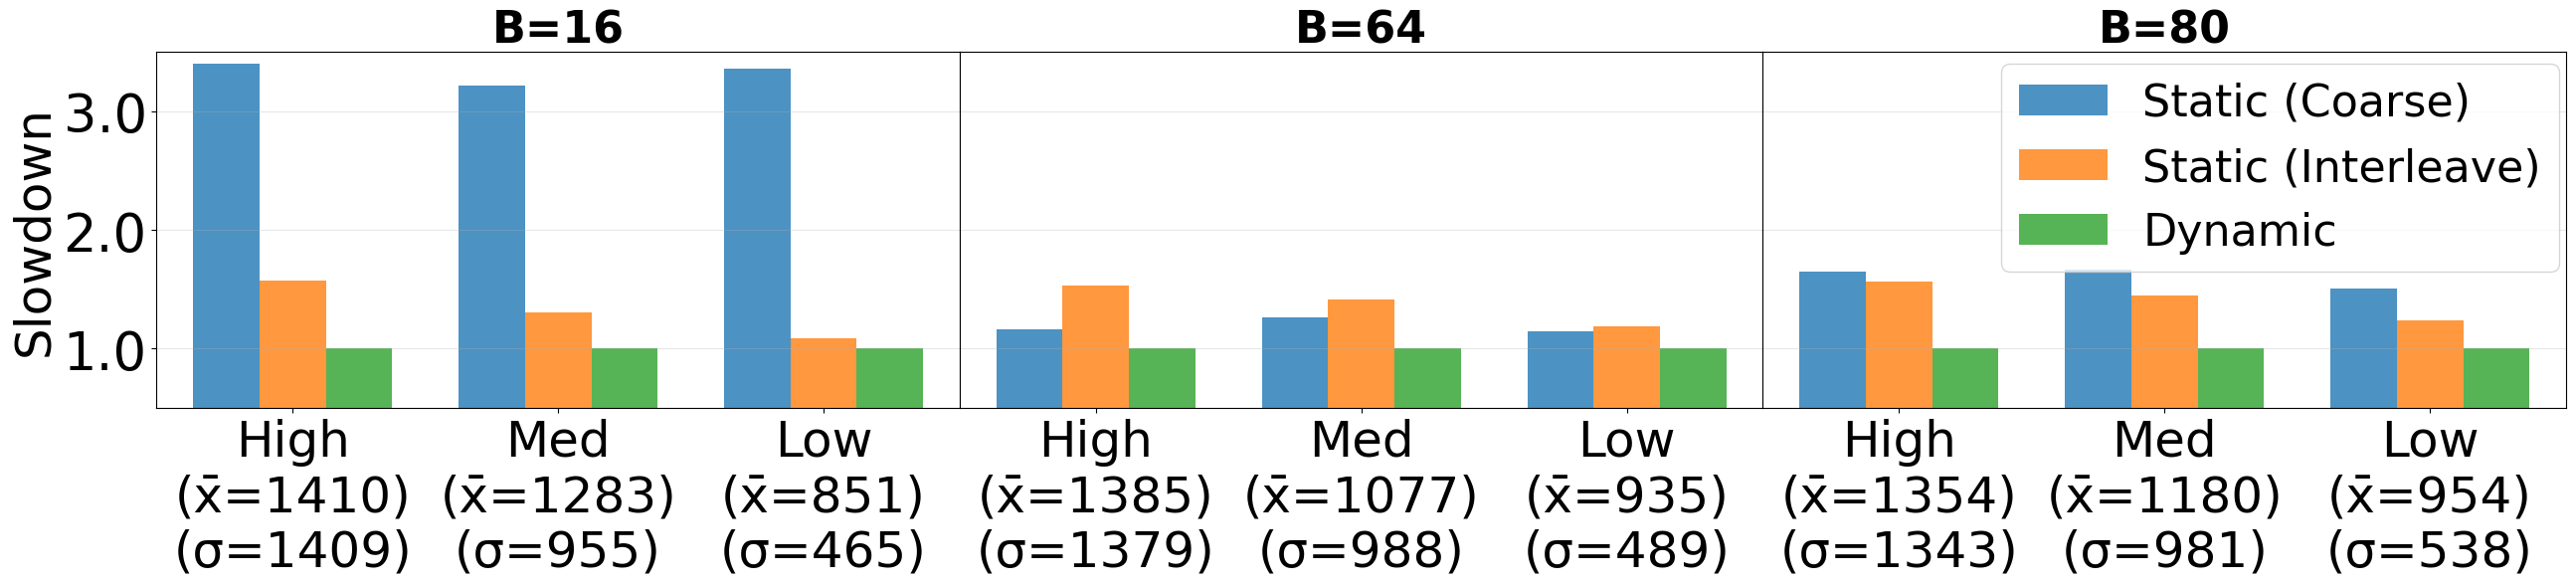

In [41]:

# Example 1: Different CSV files for each model/dataset combination
csv_files = [
    './dynamic_par/batch16_sweep_geomean_normalized.csv',  
    './dynamic_par/batch64_sweep_geomean_normalized.csv',  
    './dynamic_par/batch80_sweep_geomean_normalized.csv',    
]

x_labels_list = [
    ['High\n(x̄=1410)\n(σ=1409)','Med\n(x̄=1283)\n(σ=955)', 'Low\n(x̄=851)\n(σ=465)', ],
    ['High\n(x̄=1385)\n(σ=1379)','Med\n(x̄=1077)\n(σ=988)', 'Low\n(x̄=935)\n(σ=489)', ],
    ['High\n(x̄=1354)\n(σ=1343)','Med\n(x̄=1180)\n(σ=981)', 'Low\n(x̄=954)\n(σ=538)', ],
]

subplot_titles = [
    'B=16',
    'B=64', 
    'B=80', 
]

# Create the multi-plot chart
fig = create_multi_csv_bar_chart(
    csv_files=csv_files,figsize=(26, 6),
    x_labels_list=x_labels_list, 
    subplot_titles=subplot_titles,
    ylim=(0.5, 3.5),
    ylabel="Slowdown"
)

plt.show()


# You can also save the plots
# fig.savefig('./dyn_tiling/dyn_tile_b64.pdf', dpi=300, bbox_inches='tight')

## B = 64

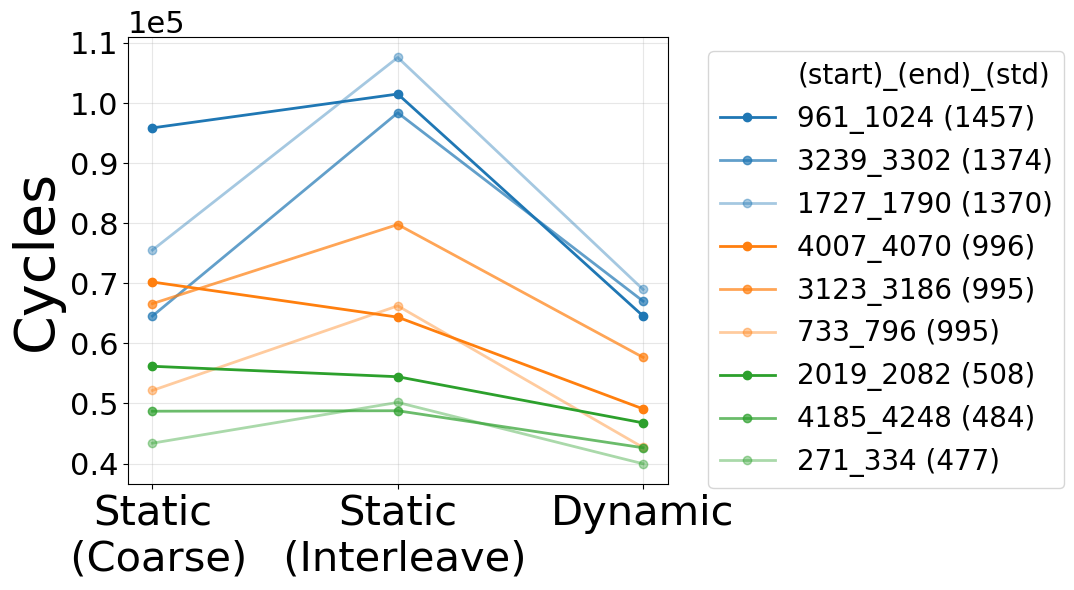

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import to_rgba

# ------------ Formatting -----------------
# Set up tab10 color palette
tab10_colors = sns.color_palette('tab10')

# Define transparency levels for variations within each color group
alphas = [1.0, 0.7, 0.4]  # Full, medium, light transparency

axis_font = 40
legend_font = 20
tick_font = 22
x_tick_size = 30

# ------------ Read CSV -----------------
# Read the CSV file
batch = 64

df = pd.read_csv(f'./dynamic_par/batch{batch}_sweep_combined.csv')  # Replace with your actual file path

# Create the plot
plt.figure(figsize=(11, 6))

# Define x-axis categories
x_categories = ['Static\n (Coarse)', 'Static\n (Interleave)', 'Dynamic']
x_positions = np.arange(len(x_categories))

# Add header text to legend (invisible plot with label only)
plt.plot([], [], ' ', label='(start)_(end)_(std)')

# Plot a line for each row
for idx, row in df.iterrows():
    # Get the cycle values for this row
    y_values = [
        row['static_coarse_cycles'],
        row['static_interleave_cycles'], 
        row['dynamic_cycles']
    ]
    
    # Create label for this line
    label = f"{row['start_idx']}_{row['end_idx']} ({row['stdev']})"
    
    # Determine color group (every 3 rows)
    color_group = idx // 3
    variation = idx % 3
    
    # Get base color from tab10 and apply transparency
    base_color = tab10_colors[color_group % len(tab10_colors)]
    alpha = alphas[variation]
    
    # Plot the line with grouped coloring (all solid lines)
    plt.plot(x_positions, y_values, 
             marker='o', 
             label=label, 
             linewidth=2,
             color=base_color,
             alpha=alpha,
             markersize=6)

# Customize the plot
# plt.xlabel('Execution Type', fontsize=axis_font)
plt.ylabel('Cycles', fontsize=axis_font)
# plt.title('Cycles by Execution Type for Different Data Ranges', fontsize=axis_font)
plt.xticks(x_positions, x_categories, fontsize=x_tick_size)
plt.yticks(fontsize=tick_font)

# Format y-axis in scientific notation
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# Make the scientific notation scale factor larger
plt.gca().yaxis.get_offset_text().set_fontsize(tick_font)

plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=legend_font)

# Adjust layout to prevent legend cutoff
plt.tight_layout()

# Show the plot
# plt.show()

# Optional: Save the plot
plt.savefig('dyn_par_b64.png', dpi=300, bbox_inches='tight')

## B = 16

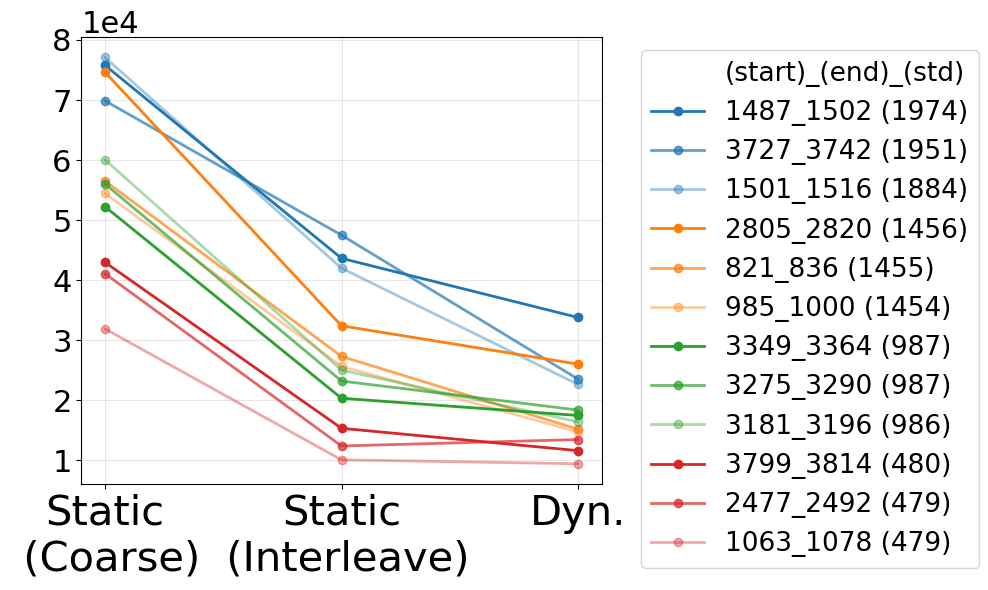

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import to_rgba

# ------------ Formatting -----------------
# Set up tab10 color palette
tab10_colors = sns.color_palette('tab10')

# Define transparency levels for variations within each color group
alphas = [1.0, 0.7, 0.4]  # Full, medium, light transparency

axis_font = 40
legend_font = 19
tick_font = 22
x_tick_size = 30

# ------------ Read CSV -----------------
# Read the CSV file
batch = 16

df = pd.read_csv(f'./dynamic_par/batch{batch}_sweep_simple.csv')  # Replace with your actual file path

# Create the plot
plt.figure(figsize=(10, 6))

# Define x-axis categories
x_categories = ['Static\n (Coarse)', 'Static\n (Interleave)', 'Dyn.']
x_positions = np.arange(len(x_categories))

# Add header text to legend (invisible plot with label only)
plt.plot([], [], ' ', label='(start)_(end)_(std)')

# Plot a line for each row
for idx, row in df.iterrows():
    # Get the cycle values for this row
    y_values = [
        row['static_coarse_cycles'],
        row['static_interleave_cycles'], 
        row['dynamic_cycles']
    ]
    
    # Create label for this line
    label = f"{row['start_idx']}_{row['end_idx']} ({row['stdev']})"
    
    # Determine color group (every 3 rows)
    color_group = idx // 3
    variation = idx % 3
    
    # Get base color from tab10 and apply transparency
    base_color = tab10_colors[color_group % len(tab10_colors)]
    alpha = alphas[variation]
    
    # Plot the line with grouped coloring (all solid lines)
    plt.plot(x_positions, y_values, 
             marker='o', 
             label=label, 
             linewidth=2,
             color=base_color,
             alpha=alpha,
             markersize=6)

# Customize the plot
# plt.xlabel('Execution Type', fontsize=axis_font)
# plt.ylabel('Cycles', fontsize=axis_font)
# plt.title('Cycles by Execution Type for Different Data Ranges', fontsize=axis_font)
plt.xticks(x_positions, x_categories, fontsize=x_tick_size)
plt.yticks(fontsize=tick_font)


# Format y-axis in scientific notation
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# Make the scientific notation scale factor larger
plt.gca().yaxis.get_offset_text().set_fontsize(tick_font)

plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=legend_font)

# Adjust layout to prevent legend cutoff
plt.tight_layout()

# Show the plot
# plt.show()

# Optional: Save the plot
plt.savefig('dyn_par_b16.pdf', dpi=300, bbox_inches='tight')

## B = 64 + 16

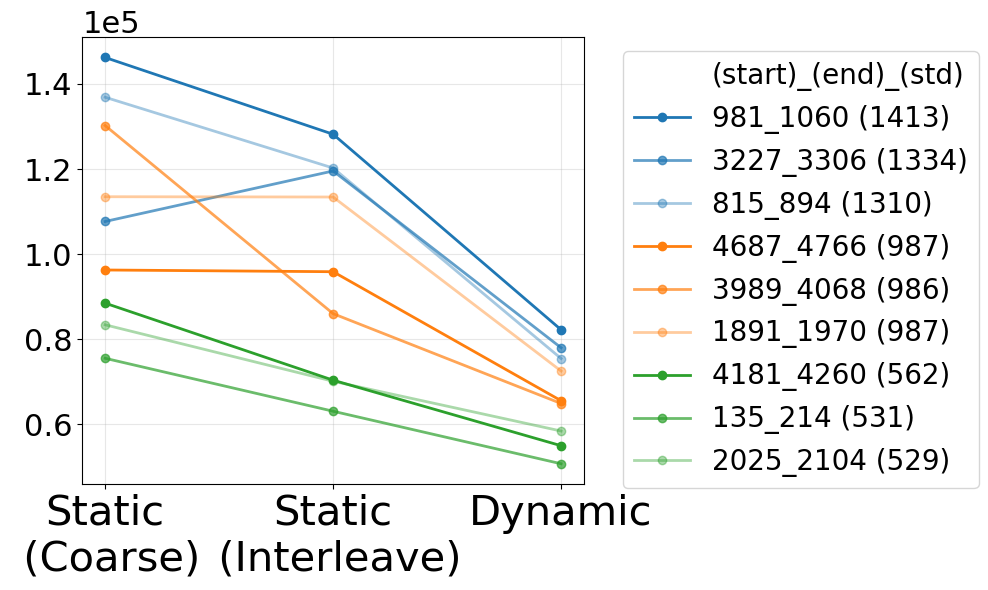

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import to_rgba

# ------------ Formatting -----------------
# Set up tab10 color palette
tab10_colors = sns.color_palette('tab10')

# Define transparency levels for variations within each color group
alphas = [1.0, 0.7, 0.4]  # Full, medium, light transparency

axis_font = 40
legend_font = 20
tick_font = 22
x_tick_size = 30

# ------------ Read CSV -----------------
# Read the CSV file
batch = 80

df = pd.read_csv(f'./dynamic_par/batch{batch}_sweep_combined.csv')  # Replace with your actual file path

# Create the plot
plt.figure(figsize=(10, 6))

# Define x-axis categories
x_categories = ['Static\n (Coarse)', 'Static\n (Interleave)', 'Dynamic']
x_positions = np.arange(len(x_categories))

# Add header text to legend (invisible plot with label only)
plt.plot([], [], ' ', label='(start)_(end)_(std)')

# Plot a line for each row
for idx, row in df.iterrows():
    # Get the cycle values for this row
    y_values = [
        row['static_coarse_cycles'],
        row['static_interleave_cycles'], 
        row['dynamic_cycles']
    ]
    
    # Create label for this line
    label = f"{row['start_idx']}_{row['end_idx']} ({row['stdev']})"
    
    # Determine color group (every 3 rows)
    color_group = idx // 3
    variation = idx % 3
    
    # Get base color from tab10 and apply transparency
    base_color = tab10_colors[color_group % len(tab10_colors)]
    alpha = alphas[variation]
    
    # Plot the line with grouped coloring (all solid lines)
    plt.plot(x_positions, y_values, 
             marker='o', 
             label=label, 
             linewidth=2,
             color=base_color,
             alpha=alpha,
             markersize=6)

# Customize the plot
# plt.xlabel('Execution Type', fontsize=axis_font)
# plt.ylabel('Cycles', fontsize=axis_font)
# plt.title('Cycles by Execution Type for Different Data Ranges', fontsize=axis_font)
plt.xticks(x_positions, x_categories, fontsize=x_tick_size)
plt.yticks(fontsize=tick_font)


# Format y-axis in scientific notation
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# Make the scientific notation scale factor larger
plt.gca().yaxis.get_offset_text().set_fontsize(tick_font)

plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=legend_font)

# Adjust layout to prevent legend cutoff
plt.tight_layout()

# Show the plot
# plt.show()

# Optional: Save the plot
plt.savefig('dyn_par_b80.pdf', dpi=300, bbox_inches='tight')

## Geomean

In [1]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('./dynamic_par/batch80_sweep_combined.csv')  # Replace with your actual file path

# Calculate speedup for each row: max(static_coarse, static_interleave) / dynamic
speedups = []
for _, row in df.iterrows():
    max_static = max(row['static_coarse_cycles'], row['static_interleave_cycles'])
    speedup = max_static / row['dynamic_cycles']
    speedups.append(speedup)
    print(f"Row {len(speedups)}: max({row['static_coarse_cycles']}, {row['static_interleave_cycles']}) / {row['dynamic_cycles']} = {speedup:.2f}x")

# Calculate geometric mean
geomean_speedup = np.exp(np.mean(np.log(speedups)))

print(f"\nIndividual speedups: {[f'{s:.2f}x' for s in speedups]}")
print(f"Geometric mean speedup: {geomean_speedup:.2f}x")

Row 1: max(146206, 128165) / 82225 = 1.78x
Row 2: max(107668, 119544) / 77995 = 1.53x
Row 3: max(136864, 120230) / 75468 = 1.81x
Row 4: max(96273, 95869) / 65553 = 1.47x
Row 5: max(130217, 86011) / 64900 = 2.01x
Row 6: max(113488, 113420) / 72531 = 1.56x
Row 7: max(88483, 70379) / 54984 = 1.61x
Row 8: max(75528, 63086) / 50743 = 1.49x
Row 9: max(83397, 70126) / 58433 = 1.43x

Individual speedups: ['1.78x', '1.53x', '1.81x', '1.47x', '2.01x', '1.56x', '1.61x', '1.49x', '1.43x']
Geometric mean speedup: 1.62x
